In [1]:
import pandas as pds
file =('./archive/Users Consumption Behavior - 2019.csv')
newData = pds.read_csv(file, delimiter=',')
 
print(newData)
print(newData.describe())  #max, min, count, mean, standard deviation etc.


      src_ip_numeric  Amazon_time_occupation  AmazonVideo_time_occupation  \
0         3232268456             5866.924013                  1109.806262   
1         3232266563             2394.652810                     0.000000   
2         3232267701            17762.991414                    24.398329   
3         3232266626             4765.766732                    54.645073   
4         3232267262             2190.290850                   424.140728   
...              ...                     ...                          ...   
1244      3232268498             1305.066075                   391.519823   
1245      3232267248            12639.348581                    63.760660   
1246      3232267249            15082.224862                  2605.541953   
1247      3232268396            36630.307506                  7674.307382   
1248      3232267612            15923.941962                   996.639689   

      Apple_time_occupation  AppleiCloud_time_occupation  \
0              

In [2]:
print(newData.info())  #info about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Columns: 114 entries, src_ip_numeric to cluster
dtypes: float64(107), int64(7)
memory usage: 1.1 MB
None


In [3]:
print(newData.rank())  #rank for specific data for the corresponding column in csv

      src_ip_numeric  Amazon_time_occupation  AmazonVideo_time_occupation  \
0             1174.0                   689.0                       1013.0   
1               56.0                   431.0                        191.0   
2              696.5                  1028.0                        416.0   
3              105.0                   621.0                        465.0   
4              428.0                   417.0                        780.0   
...              ...                     ...                          ...   
1244          1227.0                   318.0                        757.0   
1245           421.0                   929.0                        482.0   
1246           423.5                   977.0                       1134.0   
1247          1104.0                  1187.0                       1249.0   
1248           612.0                   995.0                        989.0   

      Apple_time_occupation  AppleiCloud_time_occupation  \
0              

In [4]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
data_ready = newData.copy()

scaler = StandardScaler()
num_cols = []
for row in newData:
    num_cols.append(row)
num_cols.pop(113)
#print(num_cols)
data_ready[num_cols] = scaler.fit_transform(newData[num_cols])   

data_ready.head()

feature = data_ready.drop('cluster', axis=1)

# Select Target
target = data_ready['cluster']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (999, 113)
Shape of testing feature: (250, 113)
Shape of training label: (999,)
Shape of training label: (250,)


In [5]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy
    acc = metrics.accuracy_score(y_test, y_pred)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'cm': cm}

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.932
Confusion Matrix:
 [[94  6  1]
 [ 2 69  1]
 [ 6  1 70]]


In [6]:
newData['prediction'] = dtc.predict(feature)
newData['prediction'] = newData['prediction'].apply(lambda x: 'Low' if x==0 else ('Medium' if x==1 else 'High'))

# Save new dataframe into csv file
newData.to_csv('./archive/prediction.csv', index=False)

newData.head(10)

,src_ip_numeric,Amazon_time_occupation,AmazonVideo_time_occupation,Apple_time_occupation,AppleiCloud_time_occupation,AppleiTunes_time_occupation,AppleStore_time_occupation,DataSaver_time_occupation,Deezer_time_occupation,Dropbox_time_occupation,...,WhatsApp_data_occupation,WhatsAppCall_data_occupation,WhatsAppFiles_data_occupation,Wikipedia_data_occupation,Xbox_data_occupation,Yahoo_data_occupation,YouTube_data_occupation,Zoom_data_occupation,cluster,prediction
0,3232268456,5866.924013,1109.806262,790.283133,1096.484123,53.919554,6.689058,0.000000,0.0,4297.413253,...,33965.161551,0.000000,0,18054.370741,0.000000,3672.434805,1.233127e+04,0.0,2,High
1,3232266563,2394.652810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,76045.666667,0.000000,0.000000,6.051429e+03,0.0,0,Low
2,3232267701,17762.991414,24.398329,0.000000,0.000000,0.000000,0.000000,610.120340,0.0,4284.480731,...,10520.039362,0.000000,0,0.000000,9.058147,3377.515224,3.297037e+06,0.0,2,High
3,3232266626,4765.766732,54.645073,0.000000,0.000000,28.104460,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,12386.413143,6976.721663,3560.322413,7.396501e+05,0.0,1,Medium
4,3232267262,2190.290850,424.140728,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2533.486440,...,0.000000,0.000000,0,31270.822439,5226.108275,5942.540579,1.392668e+06,0.0,1,Medium
5,3232266746,46776.600765,1059.167743,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,12111.191168,0.000000,4164.743779,1.324753e+06,0.0,1,Medium
6,3232266756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,Low
7,3232267542,35302.722229,420.974697,0.000000,0.000000,154.149951,0.000000,0.000000,0.0,5464.748018,...,202946.588202,68975.424765,0,13670.205994,4081.661346,76460.924072,2.312498e+06,0.0,1,Medium
8,3232266905,4643.678380,316.823257,486.497282,309.070206,24.884900,33.281664,902.899305,0.0,6468.700227,...,3203.392814,0.000000,0,7387.582062,1721.925484,0.000000,1.216050e+04,0.0,2,High
9,3232268082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,Low


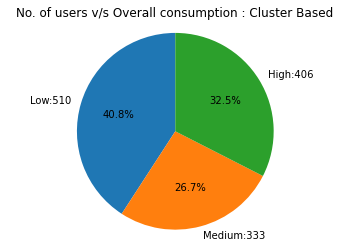

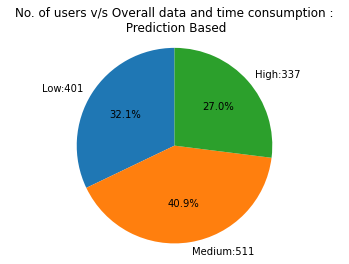

In [7]:
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def create_pie_chart1():
    data1=newData.groupby('cluster')['src_ip_numeric'].count()
    labels1=[f'Low:{data1[0]}', f'Medium:{data1[1]}', f'High:{data1[2]}']

    fig1, ax1 = plt.subplots()
    ax1.pie(data1, labels=labels1, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('No. of users v/s Overall consumption : Cluster Based')

    return fig1

def create_pie_chart2():
    data2=newData.groupby('prediction')['src_ip_numeric'].count()
    labels2=[f'Low:{data2[0]}', f'Medium:{data2[1]}', f'High:{data2[2]}']

    fig2, ax2 = plt.subplots()
    ax2.pie(data2, labels=labels2, autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.set_title('No. of users v/s Overall data and time consumption :\n Prediction Based')
    return fig2

def getAccuracy():
    tk.messagebox.showinfo("Info", f"Accuracy of the classifier implementation: {dtc_eval['acc']}")
    
def getConfusion():
    tk.messagebox.showinfo("Info", f"Confusion Matrix of the classifier implementation:\n {dtc_eval['cm']}")
    
def main():
    root = tk.Tk()
    root.title("Predicting User Engagement in Mobile Applications")
    root.geometry("1200x600")
    root.resizable(0,0)
    
    #Information
    info= '''Welcome! We have 2 comparison pie charts in the window. At the left side we have the number of users and the cluster.
The users are classified in one of three groups, Low (0), Medium (1) and High Consumption (2) and this constitutes the cluster key.
At the right side we have the number of users and the prediction of users of their engagement as Low, Medium and High classification according to the dataset given.'''
    label=tk.Label(root, text="Important! Please refer the following guideline.", bg="red", fg="white", font=(30))
    label.grid(row=0, column=0)
    text= tk.Text(root, height=8)
    text.tag_configure("center", justify='center')
    text.grid(row=1, column=0, padx=50, pady=10)
    text.insert(tk.INSERT, info)
    
    # Create the first pie chart
    fig1 = create_pie_chart1()
    canvas1 = FigureCanvasTkAgg(fig1, master=root)
    canvas1_widget = canvas1.get_tk_widget()
    canvas1_widget.grid(row=4, column=0, padx=10, pady=10)

    # Create the second pie chart
    fig2 = create_pie_chart2()
    canvas2 = FigureCanvasTkAgg(fig2, master=root)
    canvas2_widget = canvas2.get_tk_widget()
    canvas2_widget.grid(row=4, column=1, padx=10, pady=10)
    
    tk.Button(root,text="Get Accuracy", command=getAccuracy).grid(row=5, column=0)
    tk.Button(root,text="Get Confusion Matrix", command= getConfusion).grid(row=5, column=1)
    tk.Button(root,text="Exit", command= root.destroy).grid(row=6, column=0, padx=10, pady=10)

    root.mainloop()

if __name__ == "__main__":
    main()
